In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 8.4 MB/s 


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213091,ZWE,Africa,Zimbabwe,2022-08-27,256682.0,0.0,9.429,5593.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
213092,ZWE,Africa,Zimbabwe,2022-08-28,256699.0,17.0,10.714,5593.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
213093,ZWE,Africa,Zimbabwe,2022-08-29,256704.0,5.0,10.857,5593.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
213094,ZWE,Africa,Zimbabwe,2022-08-30,256708.0,4.0,11.429,5593.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns)
print(df.shape)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.index

RangeIndex(start=0, stop=213096, step=1)

In [ ]:

df = df.loc[(df['location'] != 'High income') & (df['location'] !='Europe') & (df['location'] !='Africa') & (df['location'] !='Asia') & (df['location'] !='Europe') 
& (df['location'] !='North America') & #(df['location'] !='Albania') &
(df['location'] !='Lower middle income') & (df['location'] !='South America') & (df['location'] !='Upper middle income') & (df['location'] !='European Union') & (df['location'] !='World')]

In [ ]:
total_cases = df.groupby('location')['new_cases_per_million'].sum()
total_cases = total_cases.sort_values(ascending=False)

most_affected_countries = total_cases[1:11].index

cases = total_cases[1:11].values # Number of Cases in Top 10 Countries 

total_deaths = df.groupby('location')['new_deaths_per_million'].sum()
deaths = total_deaths[most_affected_countries].values # Number of Deaths in Top 10 Countries

cases_deaths_df = pd.DataFrame({'Country': most_affected_countries, 'Total Cases': cases, 'Total Deaths': deaths})
print(cases_deaths_df)

                     Country  Total Cases  Total Deaths
0                     Cyprus   643162.375      1303.508
1                  Gibraltar   614386.252      3275.168
2                 San Marino   603715.997      3496.696
3                    Andorra   582369.613      1973.857
4                    Denmark   559458.777      1173.349
5                    Austria   555476.968      2309.631
6                    Iceland   553528.576       488.746
7  Saint Pierre and Miquelon   532551.422       169.981
8                   Slovenia   531617.290      3200.416
9                   Portugal   526748.960      2415.422


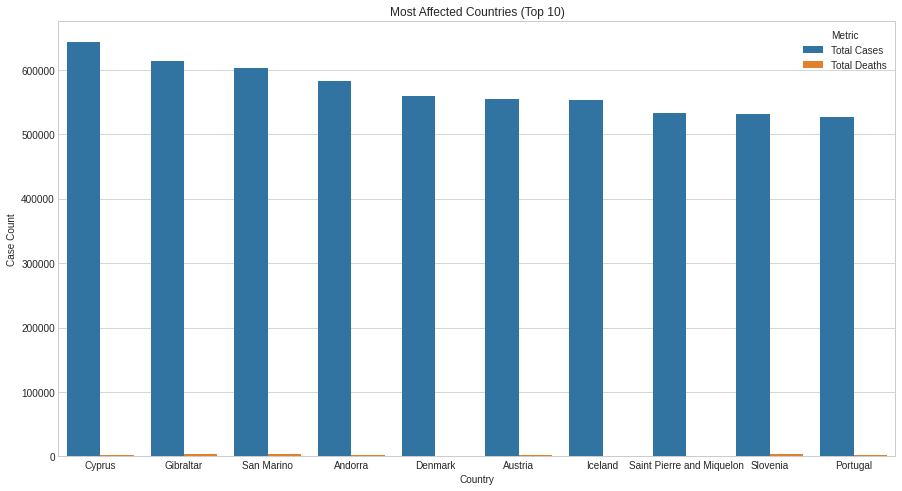

In [ ]:
plot_data = pd.melt(cases_deaths_df, id_vars = ['Country'],  value_vars=['Total Cases', 'Total Deaths'], 
                var_name='Metric', value_name='Case Count') # Plot Friendly Format
plt.figure(figsize=(15, 8))
sns.barplot(x="Country", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

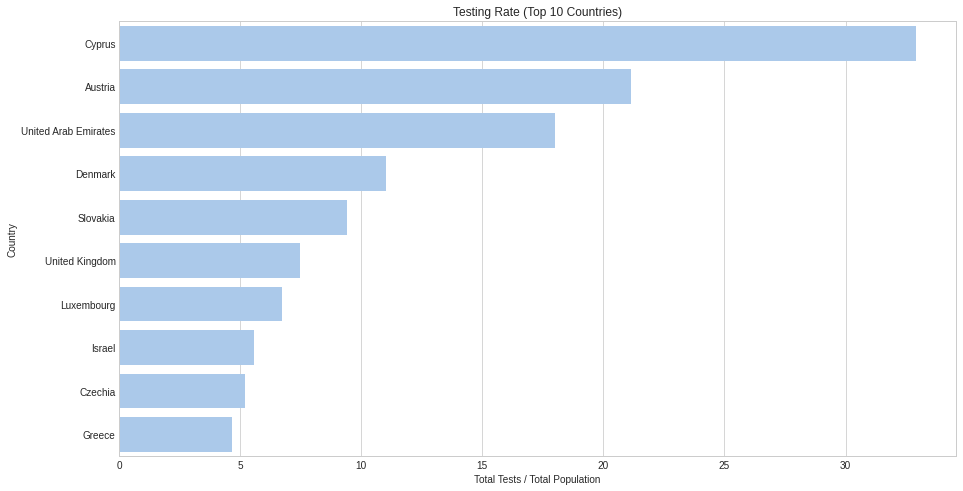

In [ ]:
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]

plt.figure(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "h", color="b")
plt.title('Testing Rate (Top 10 Countries)')
plt.xlabel('Total Tests / Total Population')
plt.ylabel('Country')
plt.show()

           date  new_cases_x  new_cases_y
939  2022-08-27      46402.0      11351.0
940  2022-08-28      46133.0       6833.0
941  2022-08-29      38883.0      85802.0
942  2022-08-30      36479.0      87798.0
943  2022-08-31      45784.0     153567.0


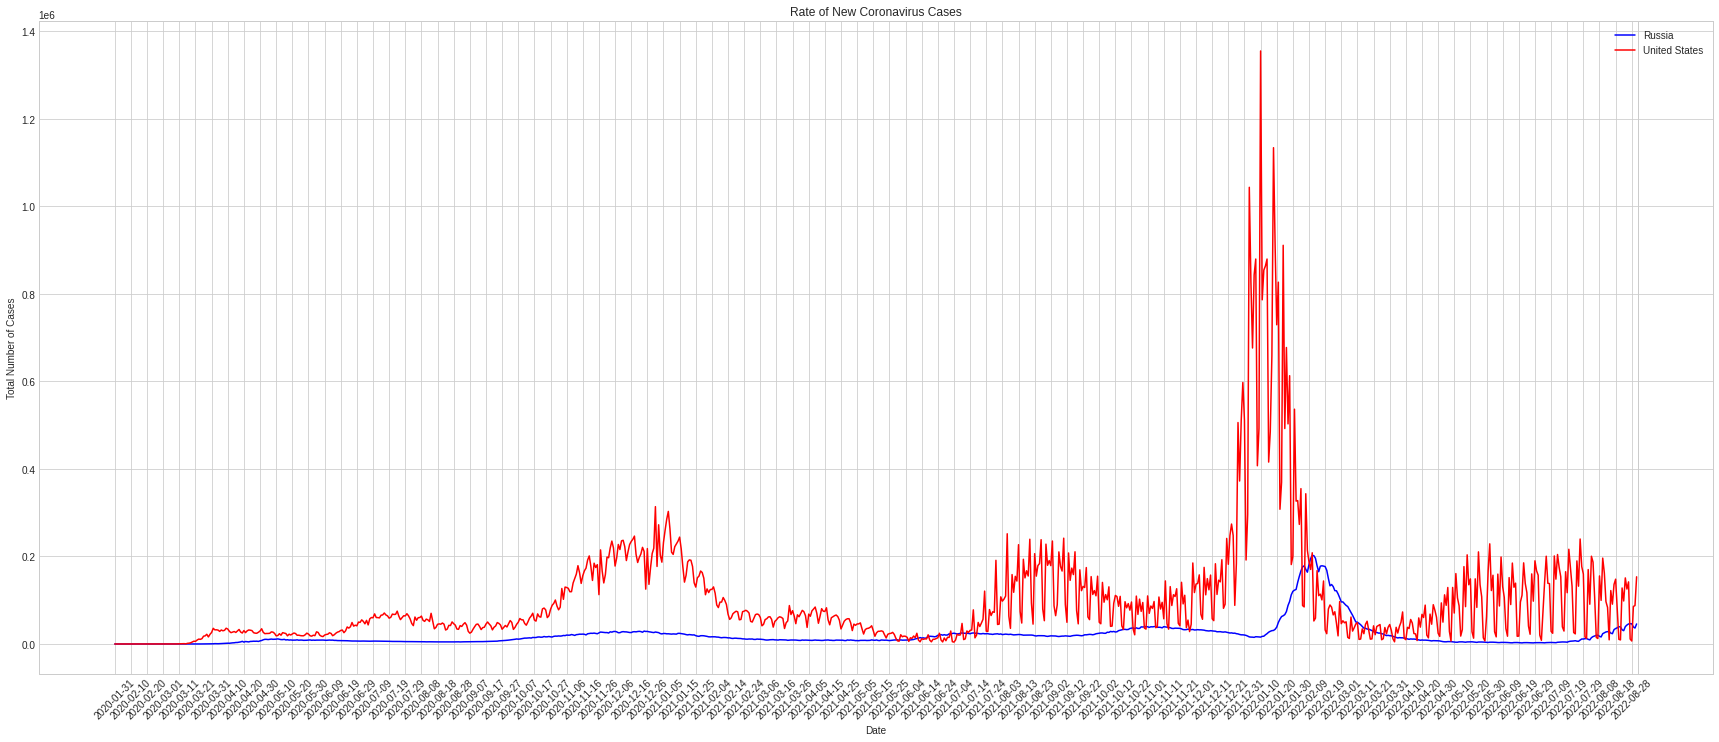

In [ ]:
country1 = 'Russia'
country1_data = df.loc[df['location'] == country1]
country1_cases = country1_data[['date','new_cases']]

country2 = 'United States'
country2_data = df.loc[df['location'] == country2]
country2_cases = country2_data[['date','new_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'date') 
print(datewise_cases.tail())


plt.figure(figsize=(30, 12))
plt.plot(datewise_cases['date'].values, datewise_cases['new_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['date'].values, datewise_cases['new_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['date'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of New Coronavirus Cases')
plt.legend()
plt.show()

In [ ]:
most_affected_countries = total_cases[1:].index
df_corr = pd.DataFrame(most_affected_countries.values, columns = ['Country'])
cases = total_cases[1:].values
deaths = total_deaths[most_affected_countries].values
df_corr['Total Cases'] = cases

df_corr['Total Deaths'] = deaths

pop_density = df.groupby('location')['population_density'].nth(-1)
df_corr['Population Density'] = pop_density[most_affected_countries].values

median_age = df.groupby('location')['median_age'].nth(-1)
df_corr['Median Age'] = median_age[most_affected_countries].values

diabetes_prevalence = df.groupby('location')['diabetes_prevalence'].nth(-1)
df_corr['Diabetes Prevelance'] = diabetes_prevalence[most_affected_countries].values

stringency_index = df.groupby('location')['stringency_index'].mean()
df_corr['Stringency Index'] = stringency_index[most_affected_countries].values

gdp = df.groupby('location')['gdp_per_capita'].nth(-1)
df_corr['gdp_per_capita'] = gdp[most_affected_countries].values

f_smokers = df.groupby('location')['female_smokers'].nth(-1) 
df_corr['Female Smokers'] = f_smokers[most_affected_countries].values

m_smokers = df.groupby('location')['male_smokers'].nth(-1) 
df_corr['Male Smokers'] = m_smokers[most_affected_countries].values

aged_70_older = df.groupby('location')['aged_70_older'].nth(-1)
df_corr['Aged 70 or older'] = aged_70_older[most_affected_countries].values

hdi = df.groupby('location')['human_development_index'].nth(-1)
df_corr['Human_development_index '] = hdi[most_affected_countries].values

hdi = df.groupby('location')['extreme_poverty'].nth(-1)
df_corr[ 'Extreme poverty'] = hdi[most_affected_countries].values

hdi = df.groupby('location')['aged_65_older'].nth(-1)
df_corr['Aged65 older'] = hdi[most_affected_countries].values

hdi = df.groupby('location')[ 'cardiovasc_death_rate'].nth(-1)
df_corr[ 'Cardiovasc death rate'] = hdi[most_affected_countries].values

hdi = df.groupby('location')['hospital_beds_per_thousand'].nth(-1)
df_corr['Hospital beds per thousand'] = hdi[most_affected_countries].values

hdi = df.groupby('location')['life_expectancy'].nth(-1)
df_corr['life_expectancy'] = hdi[most_affected_countries].values

print(df_corr.head())

      Country  Total Cases  Total Deaths  Population Density  Median Age  \
0      Cyprus   643162.375      1303.508             127.657        37.3   
1   Gibraltar   614386.252      3275.168            3457.100         NaN   
2  San Marino   603715.997      3496.696             556.667         NaN   
3     Andorra   582369.613      1973.857             163.755         NaN   
4     Denmark   559458.777      1173.349             136.520        42.3   

   Diabetes Prevelance  Stringency Index  gdp_per_capita  Female Smokers  \
0                 9.24         53.885215       32415.132            19.6   
1                  NaN               NaN             NaN             NaN   
2                 5.64         44.591702       56861.470             NaN   
3                 7.97         39.811768             NaN            29.0   
4                 6.41         40.189591       46682.515            19.3   

   Male Smokers  Aged 70 or older  Human_development_index   Extreme poverty  \
0     

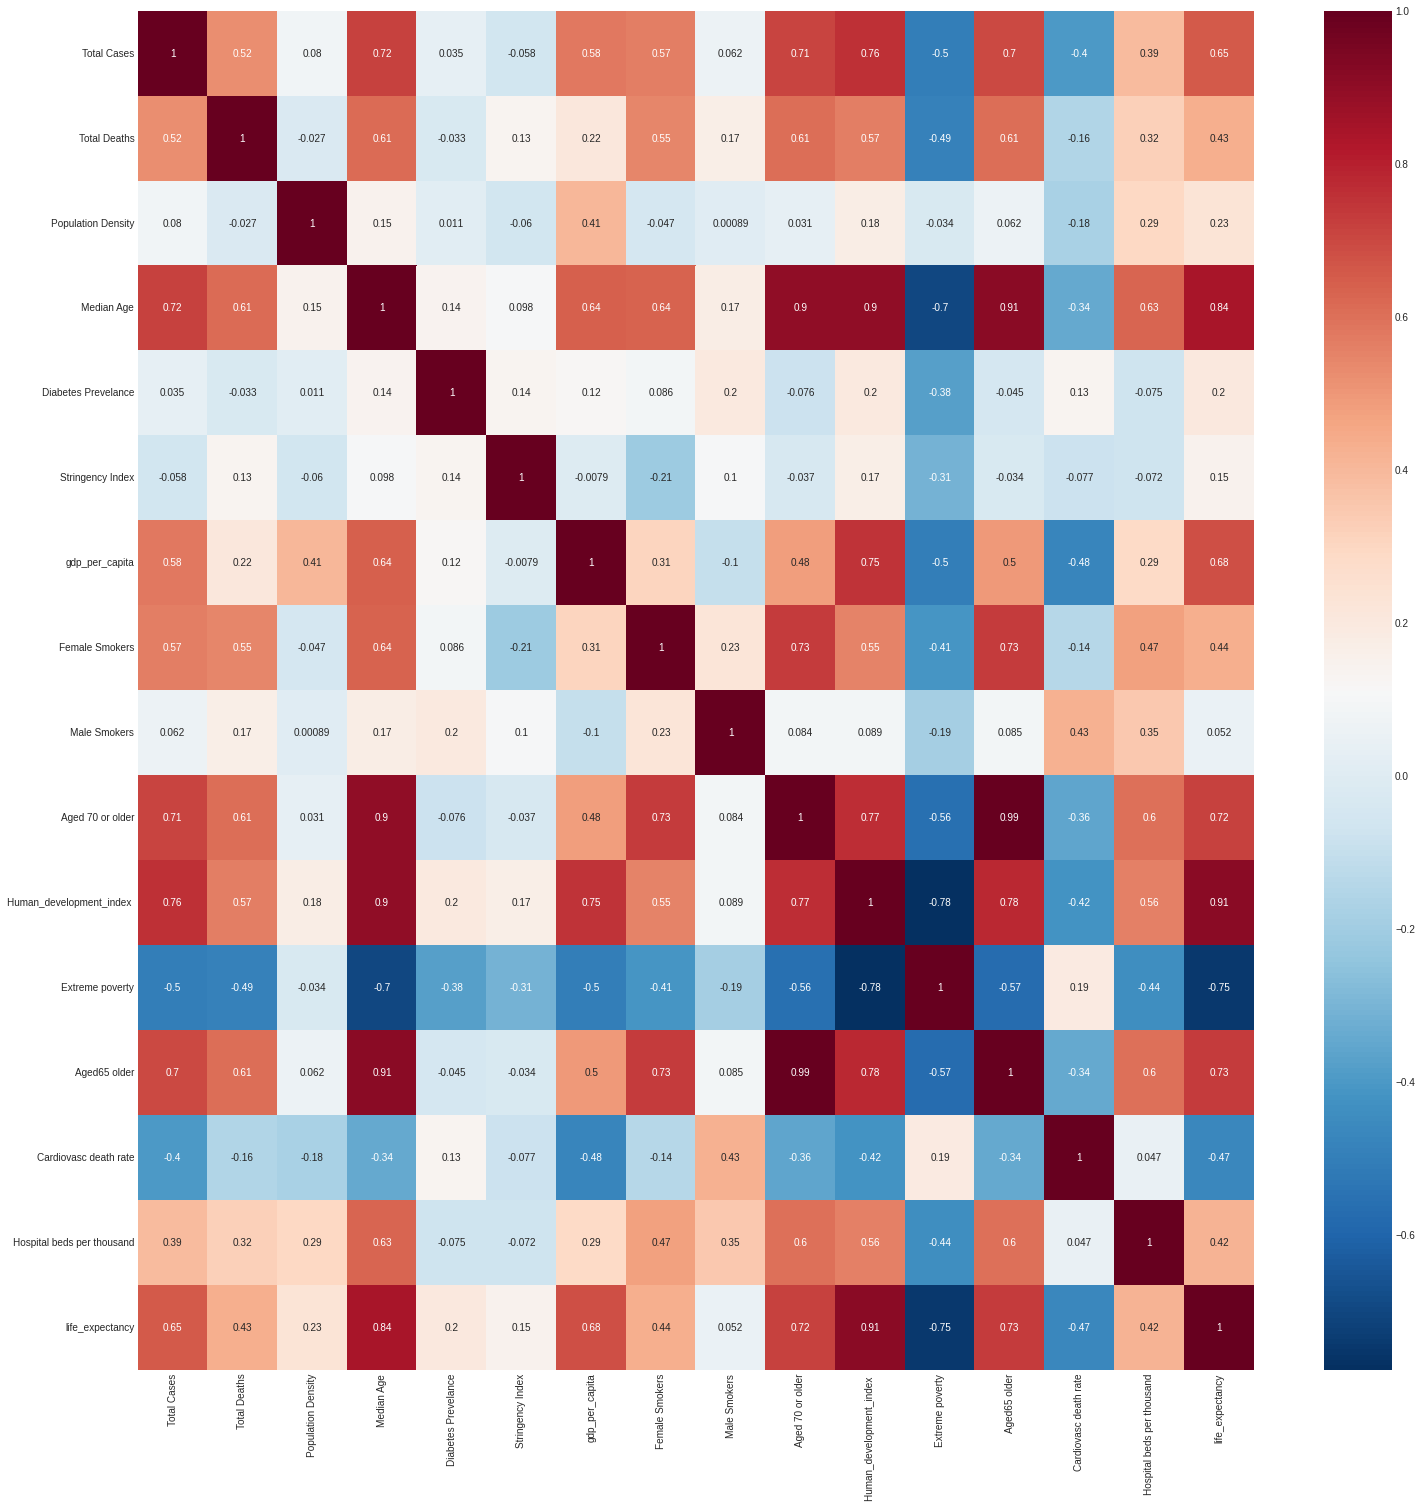

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df_corr.corr(),cmap='RdBu_r', annot = True)

In [ ]:
df_corr

,Country,Total Cases,Total Deaths,Population Density,Median Age,Diabetes Prevelance,Stringency Index,gdp_per_capita,Female Smokers,Male Smokers,Aged 70 or older,Human_development_index,Extreme poverty,Aged65 older,Cardiovasc death rate,Hospital beds per thousand,life_expectancy
0,Cyprus,643162.375,1303.508,127.657,37.3,9.24,53.885215,32415.132,19.6,52.7,8.563,0.887,NaN,13.416,141.171,3.4,80.98
1,Gibraltar,614386.252,3275.168,3457.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.93
2,San Marino,603715.997,3496.696,556.667,NaN,5.64,44.591702,56861.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,84.97
3,Andorra,582369.613,1973.857,163.755,NaN,7.97,39.811768,NaN,29.0,37.8,NaN,0.868,NaN,NaN,109.135,NaN,83.73
4,Denmark,559458.777,1173.349,136.520,42.3,6.41,40.189591,46682.515,19.3,18.8,12.325,0.940,0.2,19.677,114.767,2.5,80.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,International,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,Jersey,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Sint Maarten (Dutch part),0.000,0.000,1209.088,NaN,NaN,NaN,36327.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.95
231,Nauru,0.000,0.000,682.450,NaN,24.07,NaN,12895.635,43.0,36.9,NaN,NaN,NaN,NaN,NaN,5.0,59.96


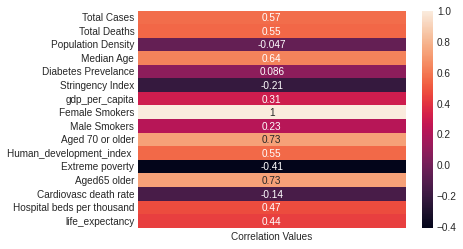

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Female Smokers'].values}, index = df_corr.corr()['Female Smokers'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

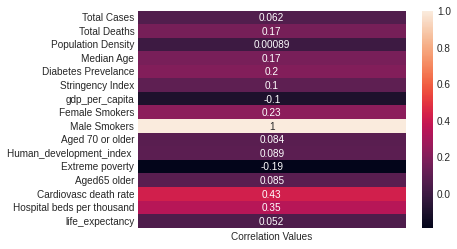

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Male Smokers'].values}, index = df_corr.corr()['Male Smokers'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

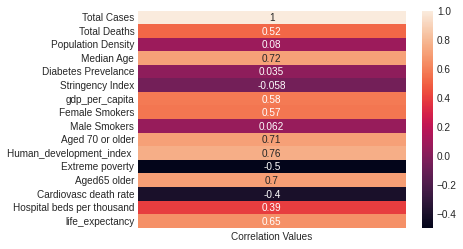

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Total Cases'].values}, index = df_corr.corr()['Total Cases'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

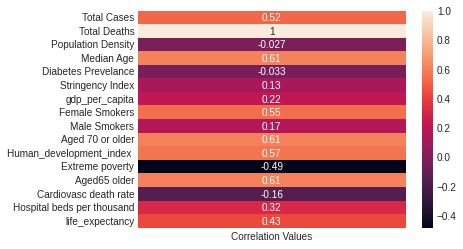

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Total Deaths'].values}, index = df_corr.corr()['Total Deaths'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

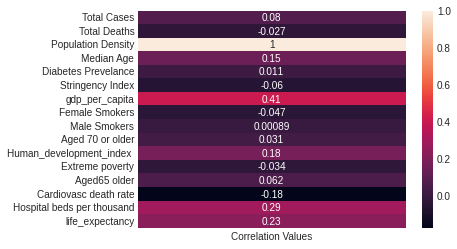

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Population Density'].values}, index = df_corr.corr()['Population Density'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

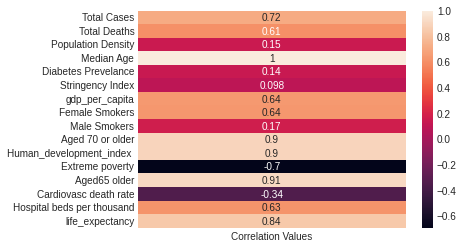

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Median Age'].values}, index = df_corr.corr()['Median Age'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

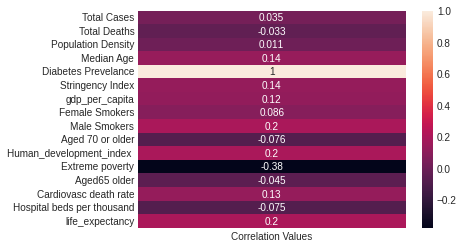

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Diabetes Prevelance'].values}, index = df_corr.corr()['Diabetes Prevelance'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

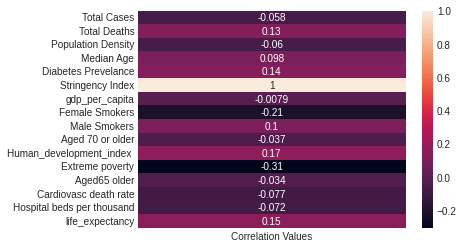

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Stringency Index'].values}, index = df_corr.corr()['Stringency Index'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

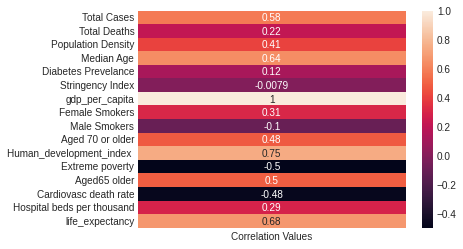

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['gdp_per_capita'].values}, index = df_corr.corr()['gdp_per_capita'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

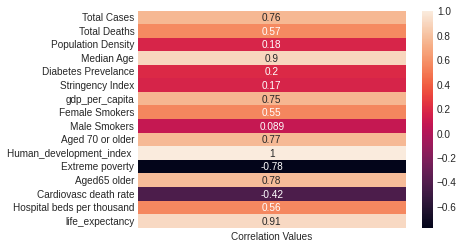

In [ ]:
heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Human_development_index '].values}, index = df_corr.corr()['Human_development_index '].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# clustering
case = df[["date", "location", "new_cases_per_million"]]
death = df[["date", "location", "new_deaths_per_million"]]
case["new_cases_per_million"] = case["new_cases_per_million"]/10000 # per hundred
death["new_deaths_per_million"] = death["new_deaths_per_million"]/10000 # per hundred

In [ ]:
cases = case.pivot_table(index='location', columns='date',
                     values = "new_cases_per_million", aggfunc='first').rename_axis('date').rename_axis(None, axis=1).reset_index()
deaths = death.pivot_table(index='location', columns='date',
                     values = "new_deaths_per_million", aggfunc='first').rename_axis('date').rename_axis(None, axis=1).reset_index()
#cases = case.pivot(index=None, columns='date', values='new_cases_per_million').reset_index() 
#.fillna(0) \
#.reset_index() \
#.rename_axis(None, axis=1)


In [ ]:
len(cases.columns)

953

In [ ]:
cases = cases.rename(columns={'date': 'location'})
cases.loc[(cases.location == "Unitet States"), 'location'] = "US"
cases.loc[(cases.location == "Unitet Kingdom"), 'location'] = "UK"
cases.loc[(cases.location == "Russia"), 'location'] = "Russian Federation"
cases["location"]

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
             ...        
213              Vietnam
214    Wallis and Futuna
215                Yemen
216               Zambia
217             Zimbabwe
Name: location, Length: 218, dtype: object

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
df["location"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [ ]:
c = missing_values_table(cases)["% of Total Values"].unique()


Your selected dataframe has 953 columns.
There are 864 columns that have missing values.


In [ ]:
c = missing_values_table(cases)
c

Your selected dataframe has 953 columns.
There are 864 columns that have missing values.


,Missing Values,% of Total Values
2020-01-23,207,95.0
2020-01-24,206,94.5
2020-01-25,203,93.1
2020-01-26,202,92.7
2020-01-27,199,91.3
...,...,...
2022-01-19,1,0.5
2022-01-20,1,0.5
2022-01-21,1,0.5
2022-01-22,1,0.5


In [ ]:
c["% of Total Values"].unique()

array([95. , 94.5, 93.1, 92.7, 91.3, 90.4, 89.4, 88.1, 87.2, 86.7, 86.2,
       85.8, 84.9, 83.9, 81.7, 79.4, 77.1, 75.2, 72.9, 70.6, 68.3, 65.1,
       63.8, 61. , 59.2, 55. , 54.6, 52.3, 51.4, 49.5, 47.2, 45.9, 41.7,
       34.9, 32.6, 30.3, 28.4, 26.1, 22.9, 19.7, 19.3, 17. , 16.1, 15.6,
       15.1, 13.3, 12.8, 11.5, 11. , 10.1,  9.6,  9.2,  7.8,  7.3,  6.9,
        6.4,  6. ,  5.5,  5. ,  4.6,  4.1,  3.7,  3.2,  2.8,  2.3,  1.8,
        1.4,  0.9,  0.5])

In [ ]:
s = 0
for i in (c['% of Total Values']):
  if (i > 10.2):
    st = c.index[s]
    del cases[st]
  s += 1

In [ ]:
cases.iloc[:, 0]

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
             ...        
213              Vietnam
214    Wallis and Futuna
215                Yemen
216               Zambia
217             Zimbabwe
Name: location, Length: 218, dtype: object

In [ ]:
#deaths = deaths.dropna(axis=0, how='any', thresh=int(0.99*len(deaths.columns)))
cases = cases.dropna(axis=0, how='any')
cases = cases.reset_index(drop=True)
cases.rename_axis(None, axis=1)


,location,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,...,2022-08-21 00:00:00,2022-08-22 00:00:00,2022-08-23 00:00:00,2022-08-24 00:00:00,2022-08-25 00:00:00,2022-08-26 00:00:00,2022-08-27 00:00:00,2022-08-28 00:00:00,2022-08-29 00:00:00,2022-08-30 00:00:00
0,Albania,0.000701,0.000561,0.000630,0.000946,0.001016,0.000981,0.000561,0.000210,0.000596,...,0.011945,0.003643,0.021228,0.015588,0.013136,0.012401,0.011840,0.007566,0.001962,0.015623
1,Algeria,0.000299,0.000296,0.000315,0.000419,0.000181,0.000156,0.000233,0.000102,0.000235,...,0.000168,0.000202,0.000174,0.000163,0.000122,0.000109,0.000068,0.000043,0.000093,0.000084
2,Andorra,0.007592,0.017714,0.048081,0.013918,0.034162,0.044285,0.030367,0.025306,0.024040,...,0.000000,0.000000,0.000000,0.065795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Angola,0.000000,0.000003,0.000000,0.000000,0.000006,0.000012,0.000006,0.000003,0.000006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Anguilla,0.000000,0.000000,0.006348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.374532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203136,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,United States,0.007828,0.010629,0.009578,0.009628,0.009413,0.008539,0.009494,0.008947,0.009272,...,0.002769,0.037981,0.029165,0.044810,0.037253,0.042124,0.003368,0.002028,0.025461,0.026053
106,Uzbekistan,0.000068,0.000026,0.000070,0.000065,0.000114,0.000223,0.000337,0.000185,0.000073,...,0.000035,0.000032,0.000041,0.000056,0.000053,0.000044,0.000000,0.000000,0.000000,0.000120
107,Vatican,0.000000,0.000000,0.195695,0.000000,0.000000,0.000000,0.000000,0.000000,0.195695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
108,Venezuela,0.000000,0.000028,0.000011,0.000025,0.000007,0.000014,0.000021,0.000000,0.000007,...,0.000294,0.000692,0.000383,0.000000,0.000351,0.000823,0.000567,0.000188,0.000103,0.000000


In [ ]:
cases["location"].values

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Aruba',
       'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Democratic Republic of Congo',
       'Djibouti', 'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Gabon', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Isle of Man', 'Jamaica', 'Japan',
       'Kenya', 'Kosovo', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya',
       'Low income', 'Macao', 'Malaysia', 'Maldives', 'Mali', 'Moldova',
       'Montenegro', 'Montserrat', 'Morocco', 'Myanmar', 'Namibia',
       'Netherlands', 'Nica

In [ ]:

from tslearn.clustering import TimeSeriesKMeans, KernelKMeans,KShape
from tslearn.clustering import silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [ ]:
from tslearn.utils import to_time_series_dataset

dff = cases.copy()

dff = dff.rolling(7, axis=1, min_periods=1).mean().fillna(0)
X_train = TimeSeriesScalerMinMax().fit_transform(dff.iloc[:, 1 :])
print(X_train)
colors = ['blue', 'red', 'green']
names = ['blue cluster','red cluster','green cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

[[[6.74306556e-03]
  [6.74285762e-03]
  [7.72618236e-03]
  ...
  [1.51089689e-01]
  [1.48092930e-01]
  [1.38103494e-01]]

 [[5.98304107e-02]
  [6.09773427e-02]
  [6.68388756e-02]
  ...
  [2.49454084e-02]
  [2.17931578e-02]
  [1.91686991e-02]]

 [[1.36186959e-02]
  [2.63294644e-02]
  [2.34922450e-02]
  ...
  [1.01167363e-02]
  [1.01167363e-02]
  [1.01167363e-02]]

 ...

 [[0.00000000e+00]
  [1.55555545e-01]
  [1.16666659e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[6.72695116e-04]
  [5.28177495e-04]
  [8.83449980e-04]
  ...
  [5.06379421e-02]
  [4.05096655e-02]
  [3.39203501e-02]]

 [[2.73881223e-05]
  [3.65174964e-05]
  [3.10339438e-05]
  ...
  [1.01570808e-02]
  [1.02675987e-02]
  [1.02618569e-02]]]
COVID-19 deaths vs time curves


37.865 --> 23.189 --> 23.189 --> 
32.376 --> 20.270 --> 20.071 --> 20.031 --> 20.031 --> 
27.962 --> 18.278 --> 17.705 --> 17.502 --> 17.481 --> 17.462 --> 17.462 --> 
26.890 --> 16.964 --> 16.481 --> 16.326 --> 16.326 --> 
26.142 --> 16.323 --> 15.712 --> 15.609 --> 15.534 --> 15.534 --> 
24.016 --> 15.576 --> 14.992 --> 14.888 --> 14.888 --> 
22.311 --> 14.644 --> 14.446 --> 14.361 --> 14.361 --> 
21.160 --> 13.716 --> 13.238 --> 13.089 --> 13.068 --> 13.016 --> 12.984 --> 12.984 --> 


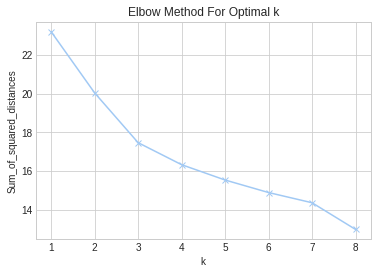

In [ ]:
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=13,
                         max_iter=10)
    y_pred = km.fit_predict(X_train)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

27.962 --> 18.278 --> 17.705 --> 17.502 --> 17.481 --> 17.462 --> 17.462 --> 
green cluster, N = 32
red cluster, N = 41
blue cluster, N = 37


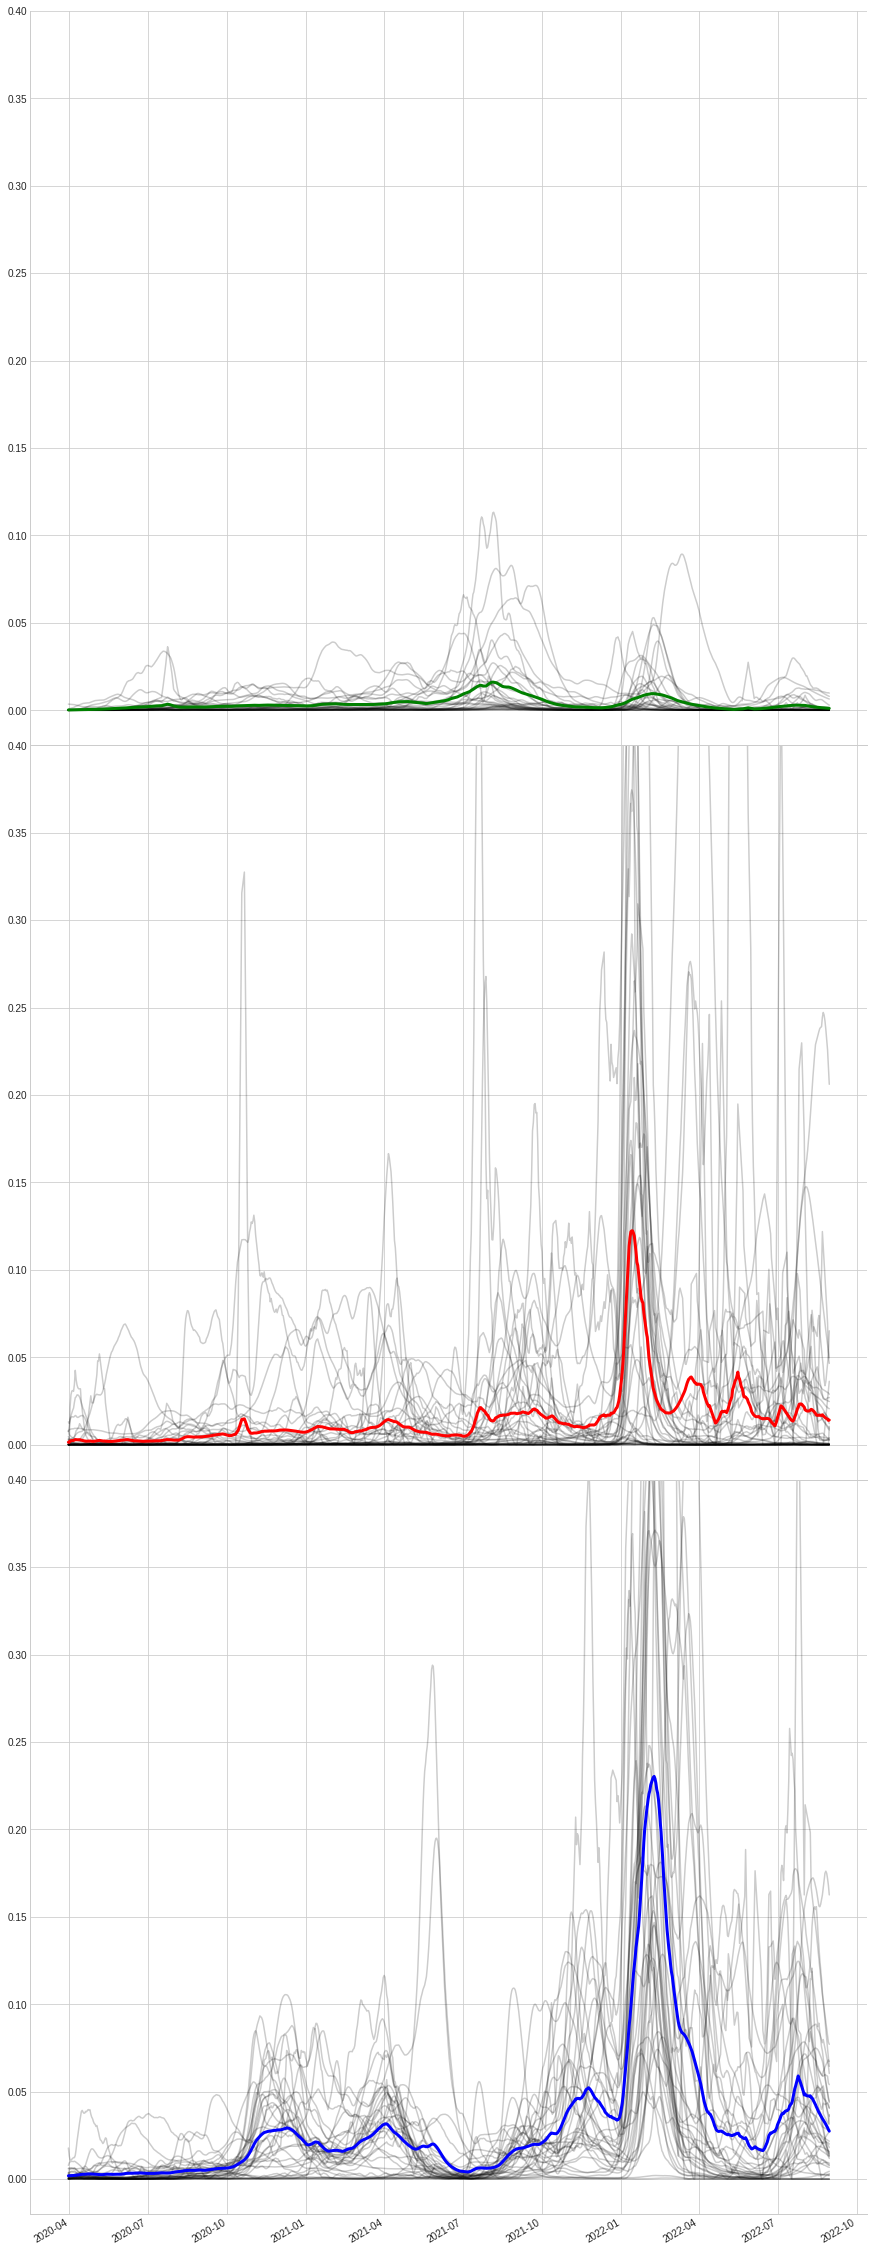

In [ ]:
cluster = 3
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=13,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=dff.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(15, 45))

for yi,cl,xs in zip(range(cluster),[2,1,0],[ax1,ax2,ax3]):
    data = dff.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
plt.ylim(-0.02, 0.4)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


In [ ]:
dff

,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30
0,0.000701,0.000631,6.305333e-04,7.093500e-04,0.000771,0.000806,0.000771,0.000701,0.000706,0.000661,...,0.021383,0.020297,0.019767,0.019767,0.018906,0.013612,0.012826,0.012200,0.011960,0.011160
1,0.000299,0.000298,3.033000e-04,3.321750e-04,0.000302,0.000278,0.000271,0.000243,0.000234,0.000220,...,0.000215,0.000202,0.000191,0.000184,0.000175,0.000160,0.000144,0.000126,0.000110,0.000097
2,0.007592,0.012653,2.446207e-02,2.182608e-02,0.024293,0.027625,0.028017,0.030547,0.031451,0.028017,...,0.013737,0.013737,0.013737,0.009399,0.009399,0.009399,0.009399,0.009399,0.009399,0.009399
3,0.000000,0.000001,9.666667e-07,7.250000e-07,0.000002,0.000003,0.000004,0.000004,0.000005,0.000005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,2.116000e-03,1.587000e-03,0.001270,0.001058,0.000907,0.000907,0.000907,0.000000,...,0.114264,0.167768,0.053505,0.053505,0.053505,0.053505,0.053505,0.053505,0.029019,0.029019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.007828,0.009229,9.344867e-03,9.415575e-03,0.009415,0.009269,0.009301,0.009461,0.009267,0.009426,...,0.025193,0.025442,0.025753,0.026385,0.025429,0.028178,0.028210,0.028104,0.026315,0.025871
106,0.000068,0.000047,5.476667e-05,5.722500e-05,0.000069,0.000094,0.000129,0.000146,0.000153,0.000158,...,0.000054,0.000048,0.000044,0.000044,0.000044,0.000044,0.000037,0.000032,0.000028,0.000039
107,0.000000,0.000000,6.523157e-02,4.892367e-02,0.039139,0.032616,0.027956,0.027956,0.055913,0.027956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
108,0.000000,0.000014,1.300000e-05,1.595000e-05,0.000014,0.000014,0.000015,0.000015,0.000012,0.000013,...,0.000599,0.000698,0.000520,0.000462,0.000512,0.000538,0.000444,0.000429,0.000345,0.000290
